# <center><font color= darkblue>Anomaly Detection using Unsupervised Machine Learning

#### Note : Create seperate Environment for a file and run necessory jars

In [5]:
#!pip install ipympl

In [6]:
#!pip install pycaret==2.3.5

In [7]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from pycaret.anomaly import *
from sklearn import preprocessing

from sklearn.ensemble import IsolationForest
from scipy.stats import kurtosis

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipympl

%matplotlib inline

## Data Gathering

In [8]:
# The data can be loaded for example like below.
df = pd.read_csv('https://hr-projects-assets-prod.s3.amazonaws.com/9omh71m21sj/a6cca10ee275c7a89fc3f4f2a257717b/unsupervisedLearningData.csv')
df_original = df
df.head(10)

,idnr,b1,b2,b3,b4,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37
0,1,0,b982aebe4b85,306,2698,0,0,7e8b1406d903,0.00,0.0,0,1.0,0.00,7e8b1406d903,0.00,0.00,0.0,254,0,2f169f9b4e6a,1,4,651938cac602,7e8b1406d903,7e8b1406d903,0.01,0,0.00,4,0,af4b5bc5ca2f,0,1.00,7e8b1406d903,0.00,0,0.00,0.0,0.0,0.0,0,255
1,2,0,615d2eb5810a,105,145,0,0,7e8b1406d903,0.00,0.0,0,1.0,0.00,7e8b1406d903,0.00,0.00,0.0,99,0,7e8b1406d903,0,1,651938cac602,7e8b1406d903,7e8b1406d903,0.02,0,0.00,1,0,af2f2ec57ada,0,0.86,7e8b1406d903,0.00,0,0.01,0.0,0.0,0.0,0,115
2,3,0,b982aebe4b85,197,9287,0,0,7e8b1406d903,0.00,0.0,0,1.0,0.00,7e8b1406d903,0.00,0.00,0.0,255,0,2f169f9b4e6a,0,2,651938cac602,7e8b1406d903,7e8b1406d903,0.00,0,0.22,9,0,af4b5bc5ca2f,0,1.00,7e8b1406d903,0.00,0,0.00,0.0,0.0,0.0,0,255
3,4,0,b982aebe4b85,247,1581,0,0,7e8b1406d903,0.00,0.0,0,1.0,0.00,7e8b1406d903,0.00,0.00,0.0,255,0,2f169f9b4e6a,0,5,651938cac602,7e8b1406d903,7e8b1406d903,0.00,0,0.00,5,0,af4b5bc5ca2f,0,1.00,7e8b1406d903,0.03,0,0.20,0.0,0.0,0.0,0,5
4,5,0,b982aebe4b85,233,1120,0,0,7e8b1406d903,0.00,0.0,0,1.0,0.00,7e8b1406d903,0.00,0.00,0.0,255,0,2f169f9b4e6a,0,3,651938cac602,7e8b1406d903,7e8b1406d903,0.00,0,0.00,3,0,af4b5bc5ca2f,0,1.00,7e8b1406d903,0.04,0,0.01,0.0,0.0,0.0,0,68
5,6,0,63deedc5b0ab,33,88,0,0,7e8b1406d903,0.00,0.0,0,1.0,0.00,7e8b1406d903,0.00,0.00,0.0,216,0,7e8b1406d903,0,1,651938cac602,7e8b1406d903,7e8b1406d903,0.01,0,0.00,1,0,af2f2ec57ada,0,0.85,7e8b1406d903,0.00,0,0.00,0.0,0.0,0.0,0,255
6,7,0,b982aebe4b85,246,188,0,0,7e8b1406d903,0.00,0.0,0,1.0,0.00,7e8b1406d903,0.00,0.00,0.0,255,0,2f169f9b4e6a,0,20,651938cac602,7e8b1406d903,7e8b1406d903,0.00,0,0.00,20,0,af4b5bc5ca2f,0,1.00,7e8b1406d903,0.00,0,0.00,0.0,0.0,0.0,0,255
7,8,0,b982aebe4b85,0,0,0,0,7e8b1406d903,1.00,1.0,0,1.0,0.00,7e8b1406d903,1.00,0.00,0.0,85,0,7e8b1406d903,0,1,9c0e1af9f7a3,7e8b1406d903,7e8b1406d903,0.00,0,0.00,1,0,af4b5bc5ca2f,0,1.00,7e8b1406d903,0.38,0,0.25,0.0,1.0,0.0,0,4
8,9,0,b982aebe4b85,218,2439,0,0,7e8b1406d903,0.00,0.0,0,1.0,0.00,7e8b1406d903,0.00,0.01,0.0,255,0,2f169f9b4e6a,0,9,651938cac602,7e8b1406d903,7e8b1406d903,0.00,0,0.00,9,0,af4b5bc5ca2f,0,1.00,7e8b1406d903,0.05,0,0.11,0.0,0.0,0.0,0,9
9,10,0,b982aebe4b85,0,0,0,0,7e8b1406d903,0.41,1.0,0,1.0,0.01,7e8b1406d903,0.44,0.00,0.0,255,0,7e8b1406d903,0,1,9c0e1af9f7a3,7e8b1406d903,7e8b1406d903,0.00,0,0.00,1,0,af4b5bc5ca2f,0,1.00,7e8b1406d903,0.08,0,0.01,0.0,1.0,0.0,0,136


## Data Transformation 

## Normalizing the numerical variables

In [9]:
# normalizing the numerical behavioural variables


df_numerical = df.drop(["idnr","b2","c3","c9","c15","c18","c19","c20","c26","c29"], 1)
df_numerical_n = pd.DataFrame(preprocessing.normalize(df_numerical))
df_numerical_n.columns = df_numerical.columns

### Transforming string attributes to categorical attributes with integers

In [10]:
# conveting strings to categorical attributes to use it in the training and prrediction
df[["b2","c3","c9","c15","c18","c19","c20","c26","c29"]] = df[["b2","c3","c9","c15","c18","c19","c20","c26","c29"]].apply(lambda z: z.astype('category').cat.codes)

In [11]:
df_processed = pd.concat([df[["idnr","b2","c3","c9","c15","c18","c19","c20","c26","c29"]], df_numerical_n], 1)

## PCA for reducing the dimension of contextual variables

In [12]:
# dropping behavioural attributes and idnr 

df_contextual = df_processed.drop(["idnr", "b1", "b2", "b3", "b4"], 1)

In [13]:
# we will initially divide to 10 PCs

pca = PCA(n_components=10)
PCs = pca.fit_transform(df_contextual)
principalDf = pd.DataFrame(data = PCs, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6','PC 7', 'PC 8', 'PC 9', 'PC 10'])
principalDf

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
0,-0.335505,-0.283181,-0.059268,0.035269,-0.018529,-0.013064,-0.004328,-0.000947,-0.000474,0.000057
1,0.298027,1.077649,-0.048181,-0.050618,0.043428,0.002958,-0.036692,0.000042,0.003584,-0.000765
2,-0.357351,-0.307636,-0.145480,0.027962,-0.017973,-0.014504,-0.000582,-0.001115,-0.000948,0.000679
3,-0.324380,-0.306372,-0.066071,-0.071212,-0.004053,-0.007897,-0.004680,-0.000867,0.001184,-0.000303
4,-0.304737,-0.285632,0.009656,-0.068382,-0.004095,-0.006450,-0.009808,-0.000716,0.001370,-0.000154
...,...,...,...,...,...,...,...,...,...,...
78759,-0.341568,-0.280418,-0.069614,0.062787,-0.022337,-0.014653,-0.003860,-0.000992,-0.000686,0.000334
78760,-0.330724,-0.270356,-0.029779,0.060036,-0.021778,-0.013681,-0.006368,-0.000909,-0.000647,-0.000124
78761,-0.334567,-0.282233,-0.055723,0.035342,-0.018547,-0.012992,-0.005527,-0.000940,-0.000486,0.000223
78762,0.243120,1.023344,-0.254657,-0.047789,0.042370,-0.001541,-0.010399,-0.000391,0.011941,0.001162


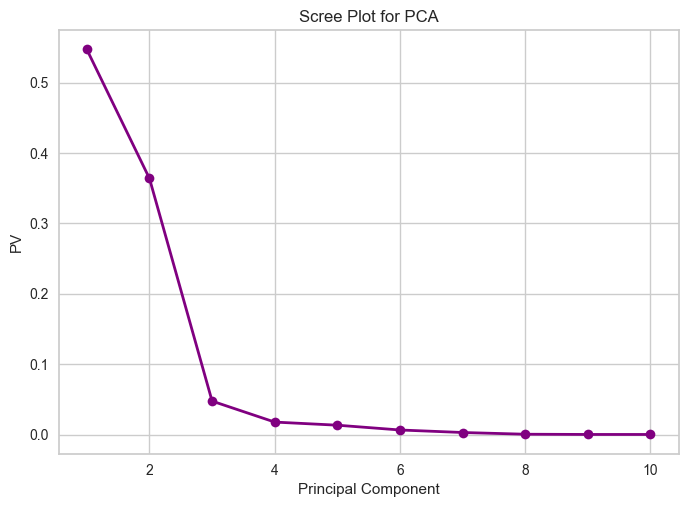

In [14]:
# drawing the Percentage Variation explained per PC

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2, color = "purple")
plt.title('Scree Plot for PCA')
plt.xlabel('Principal Component')
plt.ylabel('PV')
plt.show()

In [15]:
# cumulative percentage variance per PC

out_sum = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100, columns = ["cumPV%"] ) 
print ("Cumulative PV Explained: \n", out_sum)

Cumulative PV Explained: 
       cumPV%
0  54.691843
1  91.066548
2  95.823379
3  97.602504
4  98.938767
5  99.594573
6  99.893337
7  99.946580
8  99.967522
9  99.986278


#### Elbow occures between PC3 and PC4, to keep as much as possible info we will use 4 PCs which explain 98% of the variation

In [16]:
PC_contextual = principalDf[['PC 1', 'PC 2', 'PC 3', 'PC 4']]

## Updating Data with Contextual Principle components

In [17]:
# combining 4PCs for contextual attributs with the scaled behavioural attributes

df_dim_reduced = pd.concat([df_processed[["idnr", "b1", "b2", "b3", "b4"]], PC_contextual],1)

In [18]:
# keeping only the features for the training

features = df_dim_reduced.drop("idnr",1)
features

,b1,b2,b3,b4,PC 1,PC 2,PC 3,PC 4
0,0.000000,17,0.111717,0.985012,-0.335505,-0.283181,-0.059268,0.035269
1,0.000000,9,0.447397,0.617834,0.298027,1.077649,-0.048181,-0.050618
2,0.000000,17,0.021192,0.999022,-0.357351,-0.307636,-0.145480,0.027962
3,0.000000,17,0.152432,0.975689,-0.324380,-0.306372,-0.066071,-0.071212
4,0.000000,17,0.198461,0.953975,-0.304737,-0.285632,0.009656,-0.068382
...,...,...,...,...,...,...,...,...
78759,0.000000,16,0.966916,0.221437,-0.341568,-0.280418,-0.069614,0.062787
78760,0.000000,16,0.971001,0.171076,-0.330724,-0.270356,-0.029779,0.060036
78761,0.000000,17,0.090380,0.986681,-0.334567,-0.282233,-0.055723,0.035342
78762,0.041845,10,0.739260,0.516087,0.243120,1.023344,-0.254657,-0.047789


In [19]:
# to identify the missiing values and type of fields

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78764 entries, 0 to 78763
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   idnr    78764 non-null  int64  
 1   b1      78764 non-null  int64  
 2   b2      78764 non-null  int8   
 3   b3      78764 non-null  int64  
 4   b4      78764 non-null  int64  
 5   c1      78764 non-null  int64  
 6   c2      78764 non-null  int64  
 7   c3      78764 non-null  int8   
 8   c4      78764 non-null  float64
 9   c5      78764 non-null  float64
 10  c6      78764 non-null  int64  
 11  c7      78764 non-null  float64
 12  c8      78764 non-null  float64
 13  c9      78764 non-null  int8   
 14  c10     78764 non-null  float64
 15  c11     78764 non-null  float64
 16  c12     78764 non-null  float64
 17  c13     78764 non-null  int64  
 18  c14     78764 non-null  int64  
 19  c15     78764 non-null  int8   
 20  c16     78764 non-null  int64  
 21  c17     78764 non-null  int64  
 22

## Data Visualization

In [20]:
# Initial Inspection of Behavioural Attributes in Isolation

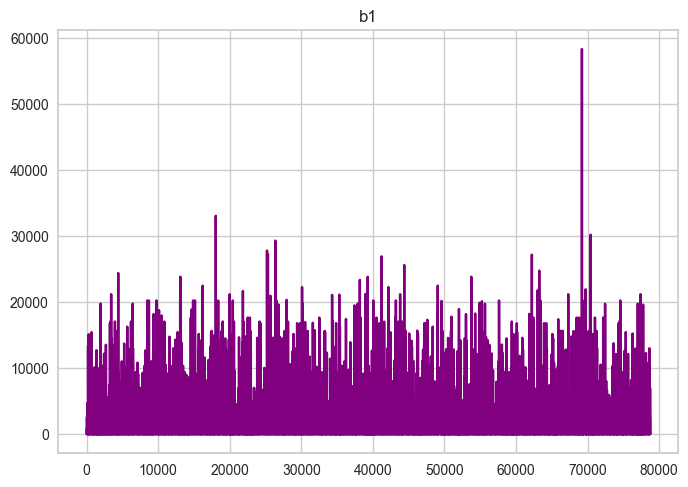

In [21]:
#plt.hist(df.b1, density = True)

plt.plot(df_original.b1, color = "purple")
plt.title("b1")
plt.show()

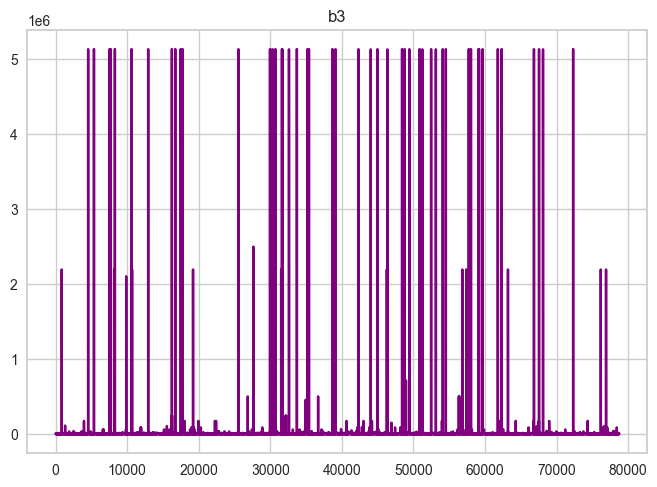

In [22]:
#plt.hist(df.b3, density = True)

plt.plot(df_original.b3, color = "purple")
plt.title("b3")
plt.show()

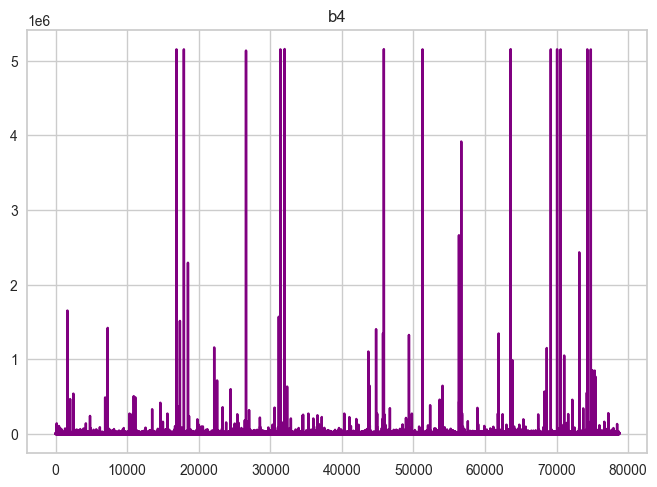

In [23]:
#plt.hist(df.b4, density = True)

plt.plot(df_original.b4, color = "purple")
plt.title("b4")
plt.show()

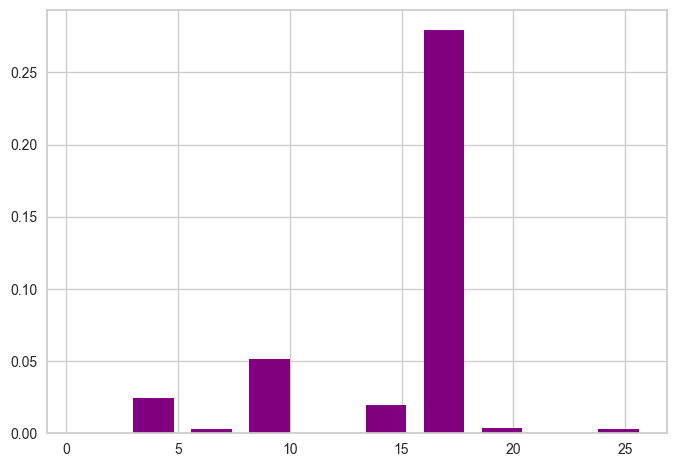

In [24]:
plt.hist(df_original.b2, color = "purple", density = True, rwidth = 0.7)
plt.show()

In [25]:
print(np.sort(df_original.b2.unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


## Scatterplot Original Data

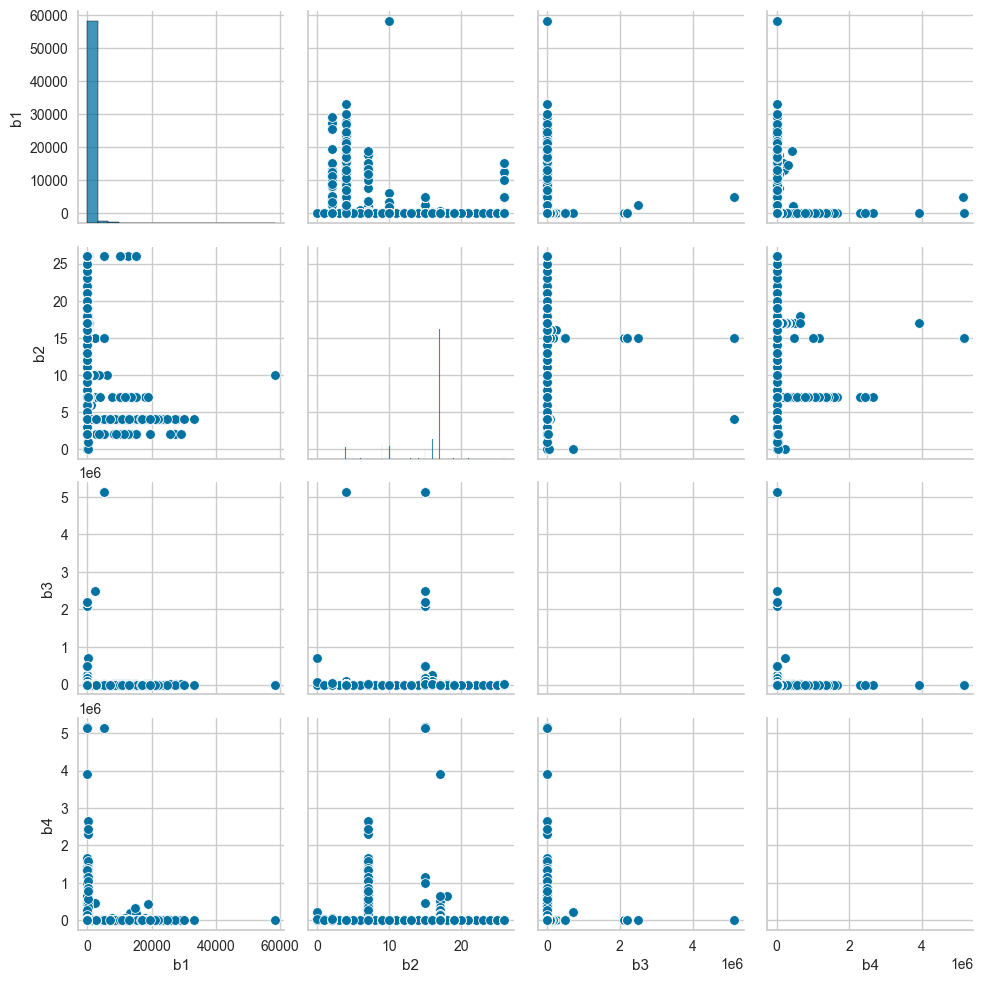

In [26]:
sns.pairplot(df_original[["b1","b2","b3","b4"]], kind='scatter', diag_kind='auto')
plt.show()

## Scatterplot Transformed Data

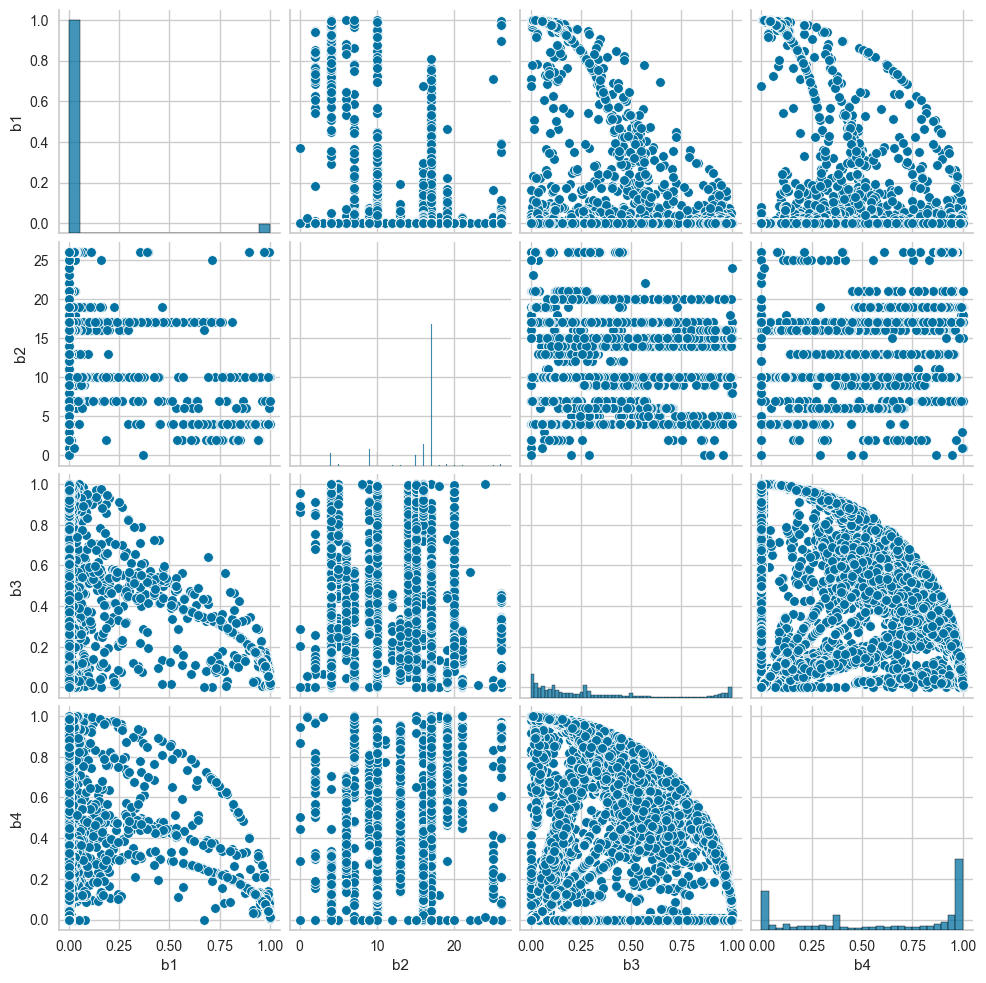

In [27]:
sns.pairplot(df_processed[["b1","b2","b3","b4"]],kind='scatter', diag_kind='auto')
plt.show()

## Kurtosis of the behavioural variables

Kurtosis: [16.7244556   1.67609696  0.07454901 -1.51975071]


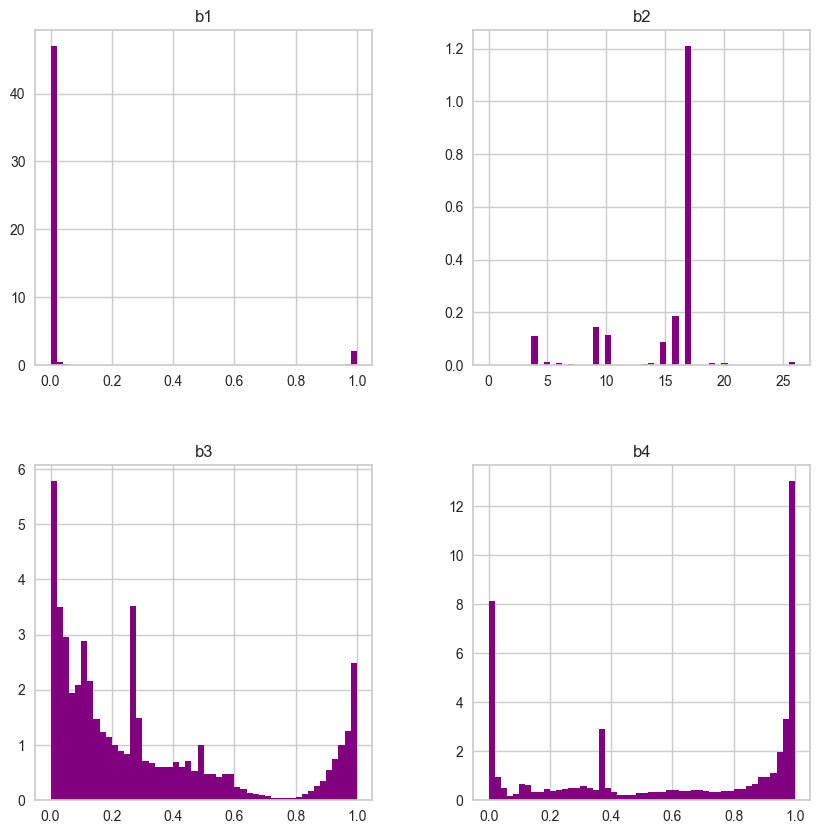

In [28]:
df_hist_ = df_processed[["b1","b2","b3","b4"]]
kur = kurtosis(df_hist_, fisher=True)
print("Kurtosis:", kur)
df_hist_.hist(figsize=(10,10), bins = 50, color = "purple", density = True)
plt.show()

## Training and Predicting: Isolation Forest

### Input Parameters

In [41]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [34]:
# n_estimators: Number of Isolation trees trained

# max_samples: Number of data points used to train each tree
# contamination: Fraction of anomalous data points, we will assume this is 1%
# max_features: Number of features to be used to train each tree
# n_jobs: The number of jobs to run in parallel for both fit and predict 

n_estimators = 50
max_samples = 500
contamination = .01
# max_features: we will keep this as by ddefault = max features
n_jobs = 1
random_state = 1 

In [43]:
anomaly = setup(data = features, silent = True)

models()

,Description,Value
0,session_id,3439
1,Original Data,"(78764, 8)"
2,Missing Values,False
3,Numeric Features,8
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(78764, 8)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=Non...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


## Fitting and Predicting Anomalies

In [44]:
# stating the model with input parameters and then fitting the model to the features

# IsolationForest_model = create_model(model = 'iforest', fraction = 0.01)
# results = assign_model(IsolationForest_model)

# defining the model
IsolationForest_model  =  IsolationForest(n_estimators, max_samples, contamination, n_jobs=1, random_state=1)

In [45]:
#fitting the model on our data

IsolationForest_model.fit(features)

# Get Anomaly Scores and Predictions
anomaly_score = IsolationForest_model.decision_function(features)
predictions = IsolationForest_model.predict(features)
df_dim_reduced["anomaly_score"] = anomaly_score
df_dim_reduced["anomaly_label"] = predictions

In [46]:
# creating dummy variable is_outlier

df_dim_reduced["is_outlier"] = df_dim_reduced["anomaly_label"].apply(lambda z: 1 if z == -1 else 0)
df_dim_reduced

,idnr,b1,b2,b3,b4,PC 1,PC 2,PC 3,PC 4,anomaly_score,anomaly_label,is_outlier
0,1,0.000000,17,0.111717,0.985012,-0.335505,-0.283181,-0.059268,0.035269,0.275962,1,0
1,2,0.000000,9,0.447397,0.617834,0.298027,1.077649,-0.048181,-0.050618,0.122399,1,0
2,3,0.000000,17,0.021192,0.999022,-0.357351,-0.307636,-0.145480,0.027962,0.273048,1,0
3,4,0.000000,17,0.152432,0.975689,-0.324380,-0.306372,-0.066071,-0.071212,0.265162,1,0
4,5,0.000000,17,0.198461,0.953975,-0.304737,-0.285632,0.009656,-0.068382,0.251393,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
78759,78760,0.000000,16,0.966916,0.221437,-0.341568,-0.280418,-0.069614,0.062787,0.221715,1,0
78760,78761,0.000000,16,0.971001,0.171076,-0.330724,-0.270356,-0.029779,0.060036,0.206304,1,0
78761,78762,0.000000,17,0.090380,0.986681,-0.334567,-0.282233,-0.055723,0.035342,0.270842,1,0
78762,78763,0.041845,10,0.739260,0.516087,0.243120,1.023344,-0.254657,-0.047789,0.042969,1,0


In [47]:
df_dim_reduced[df_dim_reduced["is_outlier"] == 1]

,idnr,b1,b2,b3,b4,PC 1,PC 2,PC 3,PC 4,anomaly_score,anomaly_label,is_outlier
17,18,0.020494,19,0.017932,0.929904,0.059695,0.317235,-0.199237,0.323701,-0.012345,-1,1
56,57,0.943402,4,0.155996,0.111425,0.171641,0.982588,-0.480855,0.050311,-0.007565,-1,1
98,99,0.000000,19,0.025795,0.821760,0.080343,0.380558,-0.060543,0.454758,-0.000495,-1,1
112,113,0.000000,20,0.112121,0.000000,0.509578,1.857019,0.066810,-0.282679,-0.004203,-1,1
309,310,0.119151,19,0.021664,0.964043,0.053701,0.277723,-0.269553,0.220283,-0.019966,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
78385,78386,0.000000,17,0.000000,0.000000,2.846256,-0.655316,0.105569,0.714176,-0.000306,-1,1
78386,78387,0.000000,17,0.000000,0.000000,4.635428,-1.622411,-0.305863,0.203307,-0.022475,-1,1
78591,78592,0.927264,4,0.176108,0.125792,0.173486,0.993160,-0.461456,0.077103,-0.016179,-1,1
78603,78604,0.000000,19,0.022349,0.890751,0.066778,0.344172,-0.144240,0.384745,-0.004193,-1,1


### There are 788 outliers:

 ## Output of the case

In [ ]:
# Saving the output on csv called solution.csv with two fields

# idnr: id of the sample
# is_outlier: binary field with 0: if not an outlier and 1: if outlier

In [48]:
# selecting only the id and outlier dummy variable for saving it on csv

final_df = df_dim_reduced[["idnr", "is_outlier"]]
final_df

,idnr,is_outlier
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
78759,78760,0
78760,78761,0
78761,78762,0
78762,78763,0


In [49]:

#saving the data on csv
final_df.to_csv("final_df_withPCA.csv", sep = ';', index=False)

In [ ]:
#plot_model(IsolationForest_model, plot = 'tsne')

In [51]:
final_df.groupby("is_outlier")["idnr"].count()

is_outlier
0    77976
1      788
Name: idnr, dtype: int64

## PCA for Visualization: Reducing dimension of all data points

In [52]:
# we will initially divide to 10 PCs
pca = PCA(n_components=5)
PCs = pca.fit_transform(features)
principalDf = pd.DataFrame(data = PCs, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])
principalDf

,PC 1,PC 2,PC 3,PC 4,PC 5
0,-2.071059,-0.311416,0.313654,-0.029263,-0.001790
1,6.054182,-0.032832,-0.013957,-0.350652,-0.135817
2,-2.074186,-0.326065,0.409738,-0.015319,0.055619
3,-2.073168,-0.299019,0.292336,0.004512,0.000943
4,-2.069887,-0.280542,0.225633,-0.016950,-0.044155
...,...,...,...,...,...
78759,-1.040455,-0.224573,-0.674726,0.480892,0.076941
78760,-1.036582,-0.202907,-0.719050,0.469889,0.066206
78761,-2.070998,-0.309280,0.328305,-0.038625,-0.002871
78762,5.065130,-0.051800,-0.270540,-0.210654,0.109250


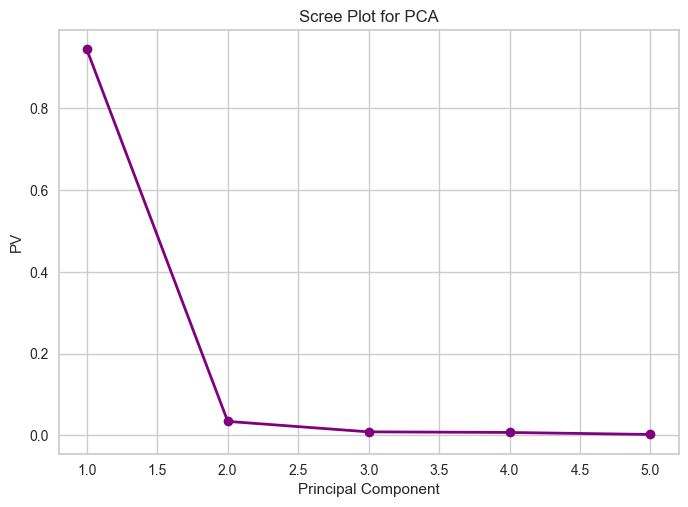

In [53]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2, color = "purple")
plt.title('Scree Plot for PCA')
plt.xlabel('Principal Component')
plt.ylabel('PV')
plt.show()

In [54]:
# cumulative percentage variance per PC
out_sum = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100, columns = ["cumPV%"] ) 
print ("Cumulative PV Explained: \n", out_sum)

Cumulative PV Explained: 
       cumPV%
0  94.430691
1  97.878673
2  98.768095
3  99.506937
4  99.752802


In [56]:
principalDf["is_outlier"] = final_df["is_outlier"]

## Outlier Visualization

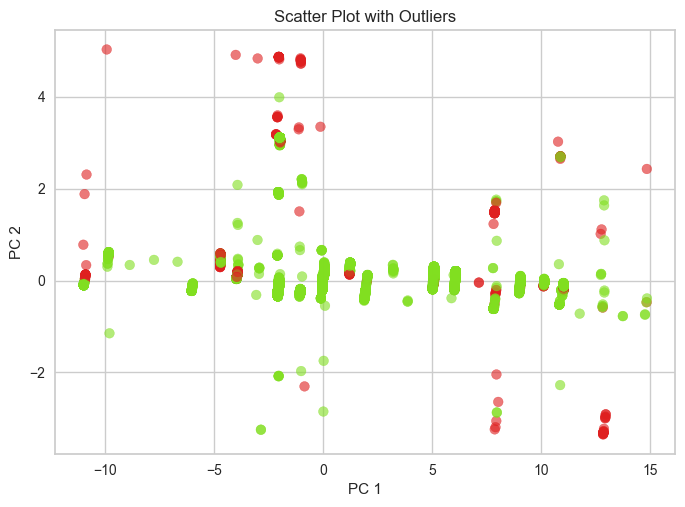

In [57]:
# green for normal point and red for outlier

colors = ['#81DF20', '#DF2020']
principalDf['c'] = principalDf.is_outlier.map({0:colors[0], 1:colors[1]})
plt.scatter(principalDf["PC 1"], principalDf["PC 2"], c=principalDf.c, alpha = 0.6)
plt.title("Scatter Plot with Outliers")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

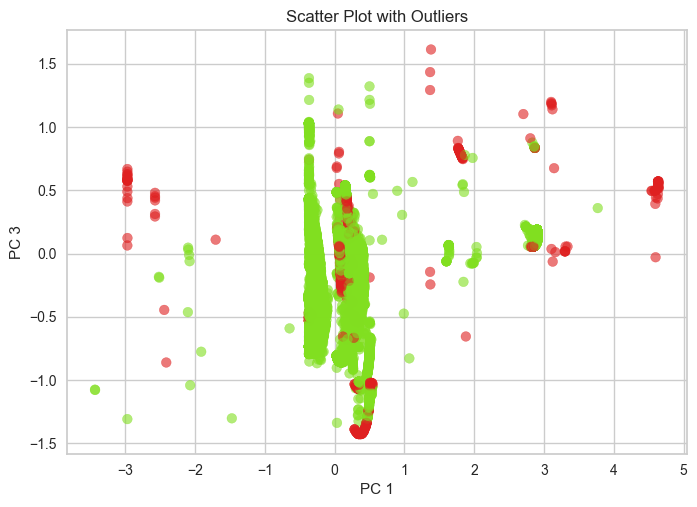

In [58]:
# green for normal point and red for outlier

colors = ['#81DF20', '#DF2020']
principalDf['c'] = principalDf.is_outlier.map({0:colors[0], 1:colors[1]})
plt.scatter(df_dim_reduced["PC 1"], principalDf["PC 3"], c=principalDf.c, alpha = 0.6)
plt.title("Scatter Plot with Outliers")
plt.xlabel("PC 1")
plt.ylabel("PC 3")
plt.show()

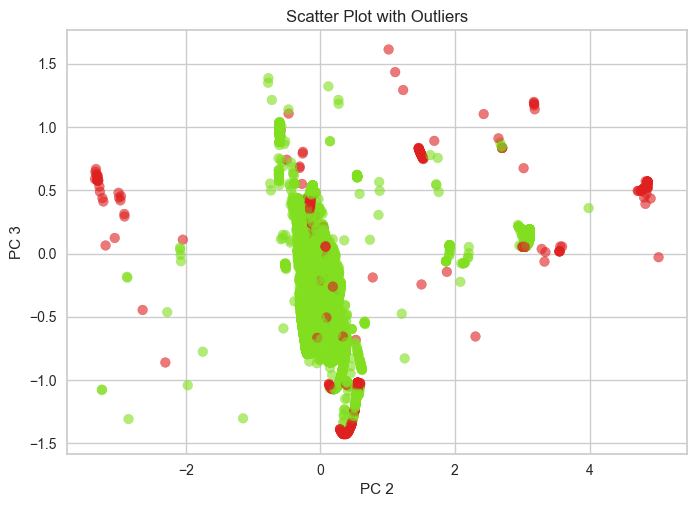

In [59]:
# green for normal point and red for outlier
colors = ['#81DF20', '#DF2020']
principalDf['c'] = principalDf.is_outlier.map({0:colors[0], 1:colors[1]})
plt.scatter(principalDf["PC 2"], principalDf["PC 3"], c=principalDf.c, alpha = 0.6)
plt.title("Scatter Plot with Outliers")
plt.xlabel("PC 2")
plt.ylabel("PC 3")
plt.show()

## Three dimensional scatter plot with PC1, PC2, PC3

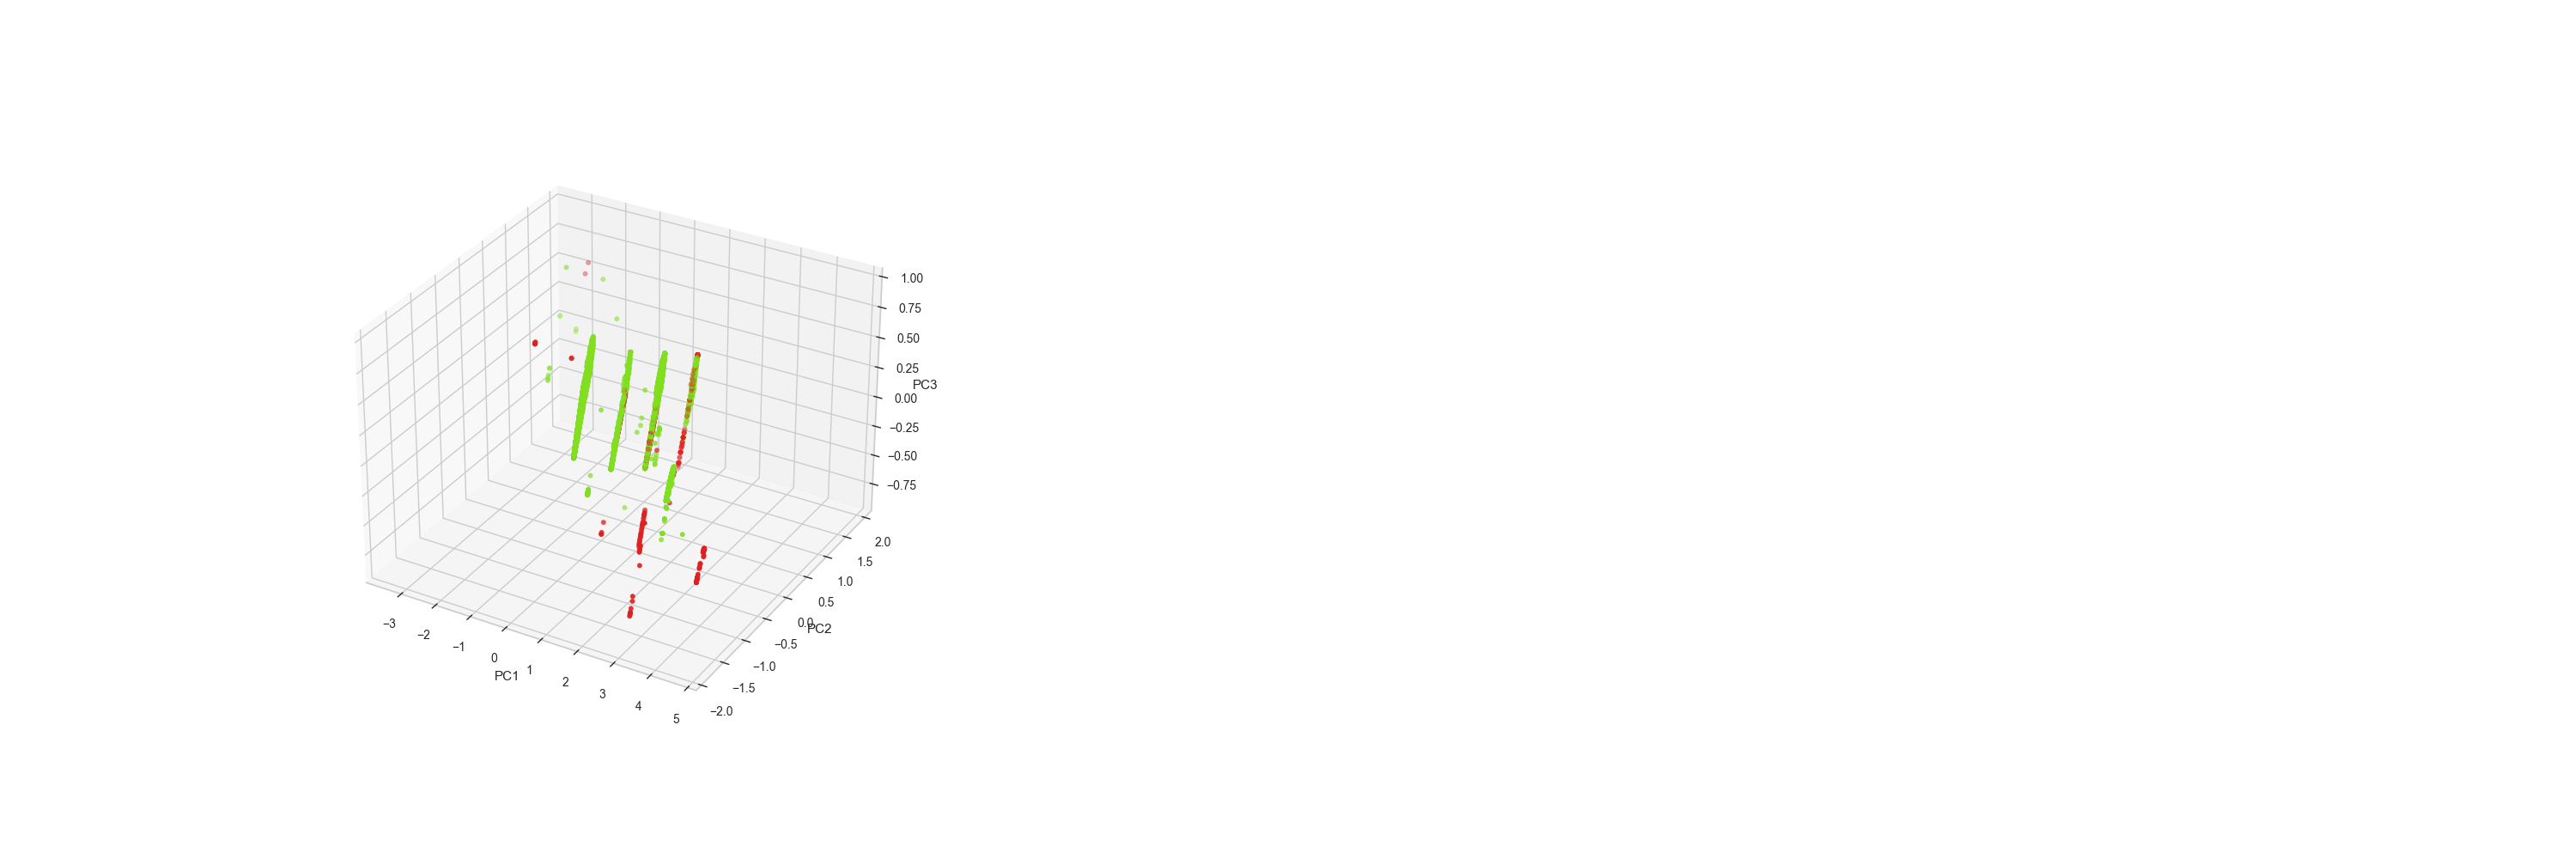

In [60]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

colors = ['#81DF20','#DF2020']
df_dim_reduced['c'] = df_dim_reduced.is_outlier.map({0:colors[0], 1:colors[1]})

fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df_dim_reduced["PC 1"], df_dim_reduced["PC 2"], df_dim_reduced["PC 3"], c=df_dim_reduced.c, s=15)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

## Evaluation of the model: Cross Scoring

In [61]:
# getting number of observations in the original data
N = df_dim_reduced.shape[0]
print(N)
# number of not outliers in the data
N_not_outliers = df_dim_reduced[df_dim_reduced.is_outlier == 0].shape[0]
print(N_not_outliers)
# 20% of the non-outliers data for testing
N_test = int(N_not_outliers*0.2)
print(N_test)
N_test_outliers1per = int(N_test*0.01)
print(N_test_outliers1per)

78764
77976
15595
155


In [62]:
# sampling randomly 20% non-anomalous data and also storing all outliers in one place
outliers = df_dim_reduced[df_dim_reduced.is_outlier == 1]
not_outliers_test = df_dim_reduced[df_dim_reduced.is_outlier == 0].sample(N_test)

In [63]:
# what we want to to randomly select 1% non-anomalous data points from this random sample and replace them with randomly selected outliers's data
target_baseline = not_outliers_test.sample(N_test_outliers1per)

#removing the slected sample from the original one
not_outliers_test_updated = not_outliers_test.drop(index = target_baseline.index)

target_baseline["idnr_notoutlier"] = target_baseline["idnr"]
target_baseline.reset_index(drop=True, inplace=True)

In [64]:
# we randomly select the same amount of 1% data from outliers to replace the target baseline non-anomalous points
selected_outliers = outliers.sample(N_test_outliers1per)
selected_outliers["idnr_outlier"] = selected_outliers["idnr"]
selected_outliers.reset_index(drop=True, inplace=True)

In [65]:
# we then switch the data of the two groups (non-anoomouls behaviour with behaviour of outliers)
switched_target = pd.concat([target_baseline[["idnr","idnr_notoutlier"]], selected_outliers[["idnr_outlier","b1", "b2", "b3", "b4","PC 1", "PC 2", "PC 3", "PC 4"]]], 1)
switched_target

,idnr,idnr_notoutlier,idnr_outlier,b1,b2,b3,b4,PC 1,PC 2,PC 3,PC 4
0,4001,4001,39663,0.000000,4,0.000000,0.000000,2.868158,-0.676453,0.126666,0.580583
1,13106,13106,56137,0.949429,4,0.147689,0.105492,0.170351,0.978099,-0.490276,0.040479
2,65017,65017,58112,0.000000,17,0.000000,0.000000,2.853868,-0.661469,0.114575,0.671503
3,47234,47234,70387,0.000000,19,0.032966,0.899966,0.072537,0.339399,-0.137478,0.352027
4,68108,68108,35955,0.881318,4,0.221087,0.159001,0.179034,1.017836,-0.413304,0.136072
...,...,...,...,...,...,...,...,...,...,...,...
150,45460,45460,58935,0.862566,4,0.236719,0.170243,0.181346,1.026307,-0.395810,0.155012
151,5320,5320,41306,0.000000,19,0.040714,0.565920,0.096693,0.458324,0.088581,0.643888
152,14615,14615,18487,0.000000,17,0.000000,0.000000,2.828687,-0.643976,0.080279,0.804083
153,13505,13505,30465,0.000000,17,0.660300,0.000000,3.306079,-1.773991,-0.102621,0.186248


In [66]:
# combine the orignal test data and the replaced/switched data

features_switched = switched_target[["b1","b2","b3","b4","PC 1","PC 2","PC 3", "PC 4"]]
features_switched["switched"] = 1
features_orig_test = not_outliers_test_updated[["b1","b2","b3","b4","PC 1","PC 2","PC 3", "PC 4"]]
features_orig_test["switched"] = 0
feature_ = pd.concat([features_switched,features_orig_test], 0)

In [67]:
#fitting the model on our data
IsolationForest_model.fit(feature_.drop("switched",1))

# Get Anomaly Scores and Predictions
anomaly_score = IsolationForest_model.decision_function(feature_.drop("switched",1))
predictions = IsolationForest_model.predict(feature_.drop("switched",1))
feature_["anomaly_label"] = predictions
# creating dummy variable is_outlier
feature_["is_outlier"] = feature_["anomaly_label"].apply(lambda z: 1 if z == -1 else 0)

In [68]:
# creating dummy variable is_outlier
feature_["is_outlier"] = feature_["anomaly_label"].apply(lambda z: 1 if z == -1 else 0)
feature_

,b1,b2,b3,b4,PC 1,PC 2,PC 3,PC 4,switched,anomaly_label,is_outlier
0,0.000000,4,0.000000,0.000000,2.868158,-0.676453,0.126666,0.580583,1,-1,1
1,0.949429,4,0.147689,0.105492,0.170351,0.978099,-0.490276,0.040479,1,1,0
2,0.000000,17,0.000000,0.000000,2.853868,-0.661469,0.114575,0.671503,1,-1,1
3,0.000000,19,0.032966,0.899966,0.072537,0.339399,-0.137478,0.352027,1,1,0
4,0.881318,4,0.221087,0.159001,0.179034,1.017836,-0.413304,0.136072,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...
26940,0.000000,17,0.100412,0.986892,-0.332279,-0.305885,-0.083927,-0.045396,0,1,0
36728,0.000000,17,0.377918,0.646294,-0.210530,-0.142935,0.434989,0.073314,0,1,0
40348,0.000000,17,0.105850,0.990096,-0.341497,-0.309179,-0.110354,-0.026380,0,1,0
36927,0.000000,17,0.226209,0.934541,-0.301613,-0.245449,0.074187,0.045923,0,1,0


##  Calculating Accuracy Meassure

In [69]:
# observations that had inded anomalies behaviour and we switched them and that the model accuratly predcited as outlier
TP = feature_[((feature_.switched == 1) & (feature_.is_outlier == 1))]["b1"].count()
# observations which are not outlier but have been identified as outliers
FP = feature_[((feature_.switched == 0) & (feature_.is_outlier == 1))]["b1"].count()
# observations which are not outlier but have been identified as non-outliers
TN = feature_[((feature_.switched == 0) & (feature_.is_outlier == 0))]["b1"].count()
# observations which are not outlier but have been identified as non-outliers
FN = feature_[((feature_.switched == 1) & (feature_.is_outlier == 0))]["b1"].count()

TPR = TP/(TP +FN)*100
print("True Positive Rate:" + str(round(TPR)) + "%")

FPR = FP/(FP +TN)*100
print("False Positive Rate:" + str(round(FPR)) + "%")

TNR = 100 - FPR
print("True Negative Rate:" + str(round(TNR)) + "%")

FNR = 100- TPR
print("False Negative Rate:" + str(round(FNR)) + "%")

P = TP/(TP + FP)
print("Precision:" + str(P))
R = TP/(TP + FN)
print("Recall:" + str(R))
F1 = 2 * P * R/(R+P)
print("F1 Score:" + str(F1))

True Positive Rate:54%
False Positive Rate:0%
True Negative Rate:100%
False Negative Rate:46%
Precision:0.532051282051282
Recall:0.535483870967742
F1 Score:0.5337620578778136
